`Hypothesis Testing on Soccer Matches between Genders with Python`

`October 2025`

This report presents the findings of a hypothesis test conducted to compare the average number of goals scored per match in FIFA World Cup games for men and women since 2002. The analysis aims to determine whether there is a statistically significant difference in scoring patterns between the two genders.

`Any questions, please reach out!`

Chiawei Wang, PhD\
Data & Product Analyst\
<chiawei.w@outlook.com>

`*` Note that the table of contents and other links may not work directly on GitHub.

[Table of Contents](#table-of-contents)
1. [Executive Summary](#executive-summary)
   - [Background](#background)
   - [Null Hypothesis](#null-hypothesis)
   - [Data Overview](#data-overview)
   - [Approach](#approach)
   - [Results](#results)
   - [Conclusion](#conclusion)
2. [Exploratory Data Analysis](#exploratory-data-analysis)

# Executive Summary

## Background

As a sports journalist, we have observed that women's international soccer matches seem to have more goals scored than men's matches. To investigate this further, we have collected data on official FIFA World Cup matches since 1st January 2002.

## Null Hypothesis

`Are more goals scored in women's international soccer matches than men's?`

We assume a 5% significance level, and use the following null and alternative hypotheses:

- H0: The mean of goals scored in women's international soccer matches is the same as men's.
- H1: The mean of goals scored in women's international soccer matches is greater than men's.

## Data Overview

The dataset contains the following columns:

| Column         | Description                   |
| -------------- | ----------------------------- |
| **date**       | Match date in ISO format      |
| **home_team**  | Name of the home team         |
| **away_team**  | Name of the away team         |
| **home_score** | Goals scored by the home team |
| **away_score** | Goals scored by the away team |
| **tournament** | Name of the competition       |

## Approach

1. Exploratory data analysis
2. Filtering the data
3. Choosing the correct hypothesis test
4. Performing the hypothesis test
5. Interpreting the result of the hypothesis test

## Results

A right-tailed Mann–Whitney U test was conducted to compare the number of goals scored per match in FIFA World Cup games for men and women since 2002. The results are as follows:

- Alpha level: 0.05
- P-value: 0.0051066098254436395
- Decision: Reject the null hypothesis

## Conclusion

The analysis indicates that there is sufficient evidence to suggest that more goals are scored in women's international soccer matches than in men's matches. This finding has important implications for the promotion and support of women's sports. Further research could explore the factors contributing to this difference in scoring patterns.

# Exploratory Data Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg

In [2]:
# Read in the CSV as a DataFrame
men = pd.read_csv('soccer_men.csv')

# Preview the data
print(men.shape)
men.head()

(44353, 6)


,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


In [3]:
# Read in the CSV as a DataFrame
women = pd.read_csv('soccer_women.csv')

# Preview the data
print(women.shape)
women.head()

(4884, 6)


,date,home_team,away_team,home_score,away_score,tournament
0,1969-11-01,Italy,France,1,0,Euro
1,1969-11-01,Denmark,England,4,3,Euro
2,1969-11-02,England,France,2,0,Euro
3,1969-11-02,Italy,Denmark,3,1,Euro
4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [4]:
# Filter the data for the time range and tournament
men['date'] = pd.to_datetime(men['date'])
men_subset = men[(men['date'] > '2002-01-01') & (men['tournament'].isin(['FIFA World Cup']))]
women['date'] = pd.to_datetime(women['date'])
women_subset = women[(women['date'] > '2002-01-01') & (women['tournament'].isin(['FIFA World Cup']))]

In [5]:
# Make explicit copies of the filtered DataFrames
men_subset = men[(men['date'] > '2002-01-01') & (men['tournament'] == 'FIFA World Cup')].copy()
women_subset = women[(women['date'] > '2002-01-01') & (women['tournament'] == 'FIFA World Cup')].copy()

# Add group and goals_scored columns safely
men_subset['group'] = 'men'
women_subset['group'] = 'women'

men_subset['goals_scored'] = men_subset['home_score'] + men_subset['away_score']
women_subset['goals_scored'] = women_subset['home_score'] + women_subset['away_score']

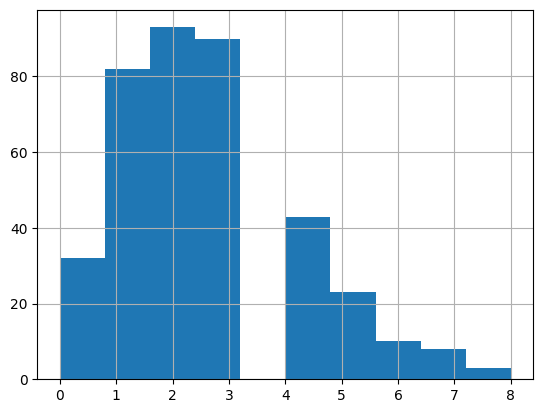

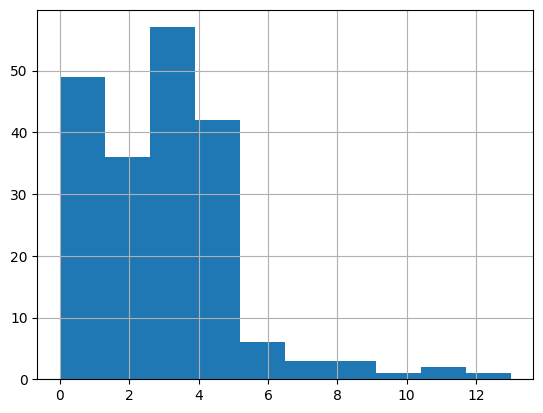

In [6]:
# Determine normality using histograms for men
men_subset['goals_scored'].hist()
plt.show()

# Determine normality using histograms for women
women_subset['goals_scored'].hist()
plt.show()

In [7]:
# Combine women's and men's data and calculate goals scored in each match
both = pd.concat([women_subset, men_subset], axis = 0, ignore_index = True)

In [8]:
# Transform the data for the pingouin Mann-Whitney U test
both_subset = both[['goals_scored', 'group']]
both_subset_wide = both_subset.pivot(columns = 'group', values = 'goals_scored')

In [9]:
# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results = pg.mwu(x = both_subset_wide['women'],
                       y = both_subset_wide['men'],
                       alternative = 'greater')

In [10]:
# Extract p-value as a float
p_value = results['p-val'].values[0]

In [11]:
# Determine hypothesis test result using alpha = 0.05
if p_value <= 0.05:
    result = 'reject'
else:
    result = 'fail to reject'

result_summary = {'p_value': p_value, 'result': result}
print(result_summary)

{'p_value': np.float64(0.0051066098254436395), 'result': 'reject'}
